In [34]:
# Import pandas
import pandas as pd

# Import yfinance
import yfinance as yf

# Import numpy
import numpy as np

# Import plot lib
import matplotlib.pyplot as plt

# Import evaluate library
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, mean_absolute_error

# Import the required libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [35]:
# 'BTC-USD': 'Bitcoin USD',
# 'ETH-USD': 'Ethereum USD',
# 'SOL-USD': 'Solana USD'

crypto = "BTC-USD"
crypto_data = yf.Ticker(crypto)
info = crypto_data.info
for key,value in info.items():
    print(key,' : ',value)

name  :  Bitcoin
startDate  :  1278979200
description  :  Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,796,178. The last known price of Bitcoin is 102,158.05922381 USD and is up 0.53 over the last 24 hours. It is currently trading on 11840 active market(s) with $38,778,167,638.77 traded over the last 24 hours. More information can be found at https://bitcoin.org/.
maxAge  :  86400
priceHint  :  2
previousClose  :  104447.664
open  :  104447.664
dayLow  :  104373.32
dayHigh  :  106449.88
regularMarketPreviousClose  :  104447.664
regularMarketOpen  :  104447.664
regularMarketDayLow  :  104373.32
regularMarketDayHigh  :  106449.88
volume  :  63453540352
regularMarketVolume  :  63453540352
averageVolume  :  50780451201
averageVolume10days  :  80234034944
averageDailyVolume10Day  :  80234034944
marketCap  :  2068718551040
fiftyTwoWeekLow  :  38521.895
fiftyTwoWeekHigh  :  106449.88
fiftyD

In [36]:
# Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

# Period must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']

interval = "1d"
period = "10y"

In [37]:
crypto_data_hist = crypto_data.history(interval=interval,period=period)
print(crypto_data_hist)

                                    Open  ...  Stock Splits
Date                                      ...              
2014-12-16 00:00:00+00:00     345.673004  ...           0.0
2014-12-17 00:00:00+00:00     326.855011  ...           0.0
2014-12-18 00:00:00+00:00     319.785004  ...           0.0
2014-12-19 00:00:00+00:00     311.178986  ...           0.0
2014-12-20 00:00:00+00:00     317.618988  ...           0.0
...                                  ...  ...           ...
2024-12-11 00:00:00+00:00   96656.062500  ...           0.0
2024-12-12 00:00:00+00:00  101167.804688  ...           0.0
2024-12-13 00:00:00+00:00  100046.648438  ...           0.0
2024-12-14 00:00:00+00:00  101451.437500  ...           0.0
2024-12-16 00:00:00+00:00  104447.664062  ...           0.0

[3653 rows x 7 columns]


In [38]:
# Clean the data for to keep only the required columns
crypto_data_close = crypto_data_hist[["Close"]]
print(crypto_data_close)

                                   Close
Date                                    
2014-12-16 00:00:00+00:00     327.062012
2014-12-17 00:00:00+00:00     319.776001
2014-12-18 00:00:00+00:00     311.395996
2014-12-19 00:00:00+00:00     317.842987
2014-12-20 00:00:00+00:00     329.955994
...                                  ...
2024-12-11 00:00:00+00:00  101173.031250
2024-12-12 00:00:00+00:00  100043.000000
2024-12-13 00:00:00+00:00  101459.257812
2024-12-14 00:00:00+00:00  101372.968750
2024-12-16 00:00:00+00:00  104498.140625

[3653 rows x 1 columns]


In [39]:
# Fill missing values
crypto_data_close = crypto_data_close.ffill()
print(crypto_data_close)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.                                   Close
Date                                    
2014-12-16 00:00:00+00:00     327.062012
2014-12-17 00:00:00+00:00     319.776001
2014-12-18 00:00:00+00:00     311.395996
2014-12-19 00:00:00+00:00     317.842987
2014-12-20 00:00:00+00:00     329.955994
...                                  ...
2024-12-11 00:00:00+00:00  101173.031250
2024-12-12 00:00:00+00:00  100043.000000
2024-12-13 00:00:00+00:00  101459.257812
2024-12-14 00:00:00+00:00  101372.968750
2024-12-16 00:00:00+00:00  104498.140625

[3653 rows x 1 columns]


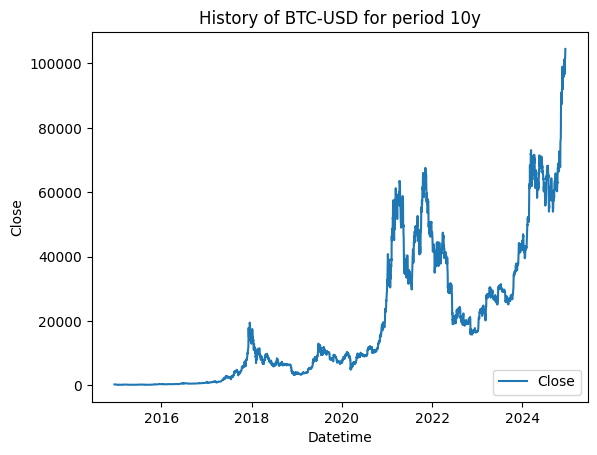

In [40]:
plt.title(f"History of {crypto} for period {period}")
plt.xlabel('Datetime')
plt.ylabel('Close')
 
plt.plot(crypto_data_hist['Close'])

plt.legend(['Close'], loc='lower right')

plt.show()

In [41]:
# Clean the data for to keep only the required columns
crypto_data_close = crypto_data_hist[["Close"]]
print(crypto_data_close)

                                   Close
Date                                    
2014-12-16 00:00:00+00:00     327.062012
2014-12-17 00:00:00+00:00     319.776001
2014-12-18 00:00:00+00:00     311.395996
2014-12-19 00:00:00+00:00     317.842987
2014-12-20 00:00:00+00:00     329.955994
...                                  ...
2024-12-11 00:00:00+00:00  101173.031250
2024-12-12 00:00:00+00:00  100043.000000
2024-12-13 00:00:00+00:00  101459.257812
2024-12-14 00:00:00+00:00  101372.968750
2024-12-16 00:00:00+00:00  104498.140625

[3653 rows x 1 columns]


In [42]:
# Fill missing values
crypto_data_close = crypto_data_close.ffill()
print(crypto_data_close)

                                   Close
Date                                    
2014-12-16 00:00:00+00:00     327.062012
2014-12-17 00:00:00+00:00     319.776001
2014-12-18 00:00:00+00:00     311.395996
2014-12-19 00:00:00+00:00     317.842987
2014-12-20 00:00:00+00:00     329.955994
...                                  ...
2024-12-11 00:00:00+00:00  101173.031250
2024-12-12 00:00:00+00:00  100043.000000
2024-12-13 00:00:00+00:00  101459.257812
2024-12-14 00:00:00+00:00  101372.968750
2024-12-16 00:00:00+00:00  104498.140625

[3653 rows x 1 columns]


In [43]:
# Scale into range 0..1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(crypto_data_close)
print(scaled_data)

[[0.0014279 ]
 [0.00135806]
 [0.00127773]
 ...
 [0.97086962]
 [0.97004246]
 [1.        ]]


In [44]:
# Define train size
split = 0.8
train_size = int(len(scaled_data) * split)
print(train_size)

2922


In [45]:
# Define training and testing area before scaled
train_data = crypto_data_close[:train_size]
test_data = crypto_data_close[train_size:]
print("Data Training")
print(train_data)
print("Data Testing")
print(test_data)

Data Training
                                  Close
Date                                   
2014-12-16 00:00:00+00:00    327.062012
2014-12-17 00:00:00+00:00    319.776001
2014-12-18 00:00:00+00:00    311.395996
2014-12-19 00:00:00+00:00    317.842987
2014-12-20 00:00:00+00:00    329.955994
...                                 ...
2022-12-11 00:00:00+00:00  17104.193359
2022-12-12 00:00:00+00:00  17206.437500
2022-12-13 00:00:00+00:00  17781.318359
2022-12-14 00:00:00+00:00  17815.650391
2022-12-15 00:00:00+00:00  17364.865234

[2922 rows x 1 columns]
Data Testing
                                   Close
Date                                    
2022-12-16 00:00:00+00:00   16647.484375
2022-12-17 00:00:00+00:00   16795.091797
2022-12-18 00:00:00+00:00   16757.976562
2022-12-19 00:00:00+00:00   16439.679688
2022-12-20 00:00:00+00:00   16906.304688
...                                  ...
2024-12-11 00:00:00+00:00  101173.031250
2024-12-12 00:00:00+00:00  100043.000000
2024-12-13 00:00:0

In [46]:
# Define training and testing area after scaled
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
print("Data Training")
print(train_data)
print("Data Testing")
print(test_data)

Data Training
[[0.0014279 ]
 [0.00135806]
 [0.00127773]
 ...
 [0.16874242]
 [0.16907152]
 [0.16475035]]
Data Testing
[[0.15787361]
 [0.15928856]
 [0.15893278]
 [0.15588162]
 [0.16035464]
 [0.1595037 ]
 [0.15962646]
 [0.1593064 ]
 [0.15979339]
 [0.15973809]
 [0.16048405]
 [0.15854165]
 [0.1569638 ]
 [0.15782432]
 [0.15744322]
 [0.15691514]
 [0.15765885]
 [0.1582665 ]
 [0.15818394]
 [0.15994181]
 [0.15968776]
 [0.16079237]
 [0.16082217]
 [0.16212649]
 [0.16313694]
 [0.1655309 ]
 [0.1702146 ]
 [0.17917445]
 [0.18914364]
 [0.19936914]
 [0.19845368]
 [0.20122241]
 [0.20114464]
 [0.19661303]
 [0.20042832]
 [0.21566758]
 [0.21663644]
 [0.21608805]
 [0.21813957]
 [0.21528334]
 [0.21989789]
 [0.21908231]
 [0.21952279]
 [0.21906613]
 [0.22619301]
 [0.21723569]
 [0.22010326]
 [0.22570608]
 [0.22329141]
 [0.22307526]
 [0.22194916]
 [0.21834313]
 [0.21646854]
 [0.22130157]
 [0.21818719]
 [0.20744755]
 [0.20583851]
 [0.20794444]
 [0.20715196]
 [0.2073427 ]
 [0.21129883]
 [0.23130493]
 [0.22474466]
 

In [47]:
# lookback = 5
# [30, 31, 94, 50, 27, 68, 37, 69, 27, 57, 25, 48, 50]
# train data  =   [30, 31, 94, 50, 27] => 68
#                 [31, 94, 50, 27, 68] => 37
#                 [94, 50, 27, 68, 37] => 69
#                 ...
#                 [69, 27, 57, 25, 48] => 50
# x train data = ([30, 31, 94, 50, 27], [31, 94, 50, 27, 68], [94, 50, 27, 68, 37], ..., [69, 27, 57, 25, 48])
# y train data = (68, 37, 69, 27, 57, 25, 48, 50)
lookback = int(7)
x_data = []
y_data = []
for i in range(lookback,len(scaled_data)):
    x_data.append(scaled_data[i-lookback:i,0])
    y_data.append(scaled_data[i,0])

# Converting the x and y values to numpy arrays
x_data, y_data = np.array(x_data), np.array(y_data)

# Reshaping x and y data to make the calculations easier
x_data = np.reshape(x_data, (x_data.shape[0],x_data.shape[1],1))
y_data = np.reshape(y_data, (y_data.shape[0],1))
print(f"X Data : {x_data.shape}")
print(x_data)
print(f"Y Data : {y_data.shape}")
print(y_data)

X Data : (3646, 7, 1)
[[[0.0014279 ]
  [0.00135806]
  [0.00127773]
  ...
  [0.00145565]
  [0.00136829]
  [0.00147415]]

 [[0.00135806]
  [0.00127773]
  [0.00133953]
  ...
  [0.00136829]
  [0.00147415]
  [0.00149989]]

 [[0.00127773]
  [0.00133953]
  [0.00145565]
  ...
  [0.00147415]
  [0.00149989]
  [0.0013845 ]]

 ...

 [[0.95612128]
  [0.95614644]
  [0.96872964]
  ...
  [0.92501238]
  [0.96812588]
  [0.95729353]]

 [[0.95614644]
  [0.96872964]
  [0.93227167]
  ...
  [0.96812588]
  [0.95729353]
  [0.97086962]]

 [[0.96872964]
  [0.93227167]
  [0.92501238]
  ...
  [0.95729353]
  [0.97086962]
  [0.97004246]]]
Y Data : (3646, 1)
[[0.00149989]
 [0.0013845 ]
 [0.0013507 ]
 ...
 [0.97086962]
 [0.97004246]
 [1.        ]]


In [48]:
xy_train_size = int(x_data.shape[0]*split)
print(xy_train_size)

2916


In [49]:
x_train_data = x_data[:xy_train_size,:,:]
y_train_data = y_data[:xy_train_size,:]
print("X Train Data")
print(x_train_data)
print("Y Train Data")
print(y_train_data)

X Train Data
[[[0.0014279 ]
  [0.00135806]
  [0.00127773]
  ...
  [0.00145565]
  [0.00136829]
  [0.00147415]]

 [[0.00135806]
  [0.00127773]
  [0.00133953]
  ...
  [0.00136829]
  [0.00147415]
  [0.00149989]]

 [[0.00127773]
  [0.00133953]
  [0.00145565]
  ...
  [0.00147415]
  [0.00149989]
  [0.0013845 ]]

 ...

 [[0.15979695]
  [0.16349085]
  [0.16252917]
  ...
  [0.16225157]
  [0.16323168]
  [0.16874242]]

 [[0.16349085]
  [0.16252917]
  [0.16248673]
  ...
  [0.16323168]
  [0.16874242]
  [0.16907152]]

 [[0.16252917]
  [0.16248673]
  [0.16225157]
  ...
  [0.16874242]
  [0.16907152]
  [0.16475035]]]
Y Train Data
[[0.00149989]
 [0.0013845 ]
 [0.0013507 ]
 ...
 [0.16907152]
 [0.16475035]
 [0.15787361]]


In [50]:

x_test_data = x_data[xy_train_size:,:,:]
y_test_data = y_data[xy_train_size:,:]
print("X Test Data")
print(x_test_data)
print("Y Test Data")
print(y_test_data)

X Test Data
[[[0.16248673]
  [0.16225157]
  [0.16323168]
  ...
  [0.16907152]
  [0.16475035]
  [0.15787361]]

 [[0.16225157]
  [0.16323168]
  [0.16874242]
  ...
  [0.16475035]
  [0.15787361]
  [0.15928856]]

 [[0.16323168]
  [0.16874242]
  [0.16907152]
  ...
  [0.15787361]
  [0.15928856]
  [0.15893278]]

 ...

 [[0.95612128]
  [0.95614644]
  [0.96872964]
  ...
  [0.92501238]
  [0.96812588]
  [0.95729353]]

 [[0.95614644]
  [0.96872964]
  [0.93227167]
  ...
  [0.96812588]
  [0.95729353]
  [0.97086962]]

 [[0.96872964]
  [0.93227167]
  [0.92501238]
  ...
  [0.95729353]
  [0.97086962]
  [0.97004246]]]
Y Test Data
[[0.15928856]
 [0.15893278]
 [0.15588162]
 [0.16035464]
 [0.1595037 ]
 [0.15962646]
 [0.1593064 ]
 [0.15979339]
 [0.15973809]
 [0.16048405]
 [0.15854165]
 [0.1569638 ]
 [0.15782432]
 [0.15744322]
 [0.15691514]
 [0.15765885]
 [0.1582665 ]
 [0.15818394]
 [0.15994181]
 [0.15968776]
 [0.16079237]
 [0.16082217]
 [0.16212649]
 [0.16313694]
 [0.1655309 ]
 [0.1702146 ]
 [0.17917445]
 [0.

In [51]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train_data.shape[1],x_train_data.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.summary()

epoch = 200

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data, y_train_data, epochs=epoch, batch_size=32)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 7, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 67s 87ms/step - loss: 0.0104
Epoch 2/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3674e-04
Epoch 3/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3418e-04
Epoch 4/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3323e-04
Epoch 5/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1769e-04
Epoch 6/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2700e-04
Epoch 7/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2984e-04
Epoch 8/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.0038e-04
Epoch 9/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1059e-04
Epoch 10/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.8095e-04
Epoch 11/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3816e-04
Epoch 12/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2304e-04
Epoch 13/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8776e-04
Epoch 14/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7241e-04
Epoc

In [52]:
# Save the model to a file
model.save('rnnbtc1d.keras')

In [53]:
# Predict data for test data
predictions = model.predict(x_test_data)
predictions = scaler.inverse_transform(predictions)
print(predictions)

23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 408ms/step
[[16523.334]
 [16600.22 ]
 [16571.334]
 [16285.344]
 [16705.16 ]
 [16650.064]
 [16665.521]
 [16630.014]
 [16674.   ]
 [16670.844]
 [16745.62 ]
 [16559.736]
 [16391.588]
 [16460.447]
 [16429.465]
 [16379.625]
 [16448.58 ]
 [16512.785]
 [16510.809]
 [16683.174]
 [16669.553]
 [16778.115]
 [16786.3  ]
 [16915.367]
 [17022.441]
 [17266.414]
 [17743.893]
 [18662.027]
 [19712.074]
 [20797.193]
 [20770.479]
 [21033.291]
 [21018.258]
 [20566.492]
 [20909.9  ]
 [22442.307]
 [22646.146]
 [22620.197]
 [22796.885]
 [22510.434]
 [22951.89 ]
 [22894.396]
 [22943.469]
 [22894.078]
 [23600.037]
 [22750.814]
 [22992.11 ]
 [23543.078]
 [23350.227]
 [23323.668]
 [23198.379]
 [22830.238]
 [22620.795]
 [23086.926]
 [22810.88 ]
 [21739.572]
 [21499.498]
 [21682.434]
 [21632.775]
 [21661.797]
 [22054.43 ]
 [24072.982]
 [23543.357]
 [24432.676]
 [24513.346]
 [24226.959]
 [24676.545]
 [24320.959]
 [24071.082]
 [23815.914]
 [23086.69 ]
 [23021.014]
 [23383.377]
 [23382.5

In [54]:
y_test = y_test_data.reshape(y_test_data.shape[0],1)
y_test = scaler.inverse_transform(y_test)
print(y_test)

[[ 16795.09179688]
 [ 16757.9765625 ]
 [ 16439.6796875 ]
 [ 16906.3046875 ]
 [ 16817.53515625]
 [ 16830.34179688]
 [ 16796.953125  ]
 [ 16847.75585938]
 [ 16841.98632812]
 [ 16919.8046875 ]
 [ 16717.17382812]
 [ 16552.57226562]
 [ 16642.34179688]
 [ 16602.5859375 ]
 [ 16547.49609375]
 [ 16625.08007812]
 [ 16688.47070312]
 [ 16679.85742188]
 [ 16863.23828125]
 [ 16836.73632812]
 [ 16951.96875   ]
 [ 16955.078125  ]
 [ 17091.14453125]
 [ 17196.5546875 ]
 [ 17446.29296875]
 [ 17934.89648438]
 [ 18869.58789062]
 [ 19909.57421875]
 [ 20976.29882812]
 [ 20880.79882812]
 [ 21169.6328125 ]
 [ 21161.51953125]
 [ 20688.78125   ]
 [ 21086.79296875]
 [ 22676.55273438]
 [ 22777.625     ]
 [ 22720.41601562]
 [ 22934.43164062]
 [ 22636.46875   ]
 [ 23117.859375  ]
 [ 23032.77734375]
 [ 23078.72851562]
 [ 23031.08984375]
 [ 23774.56640625]
 [ 22840.13867188]
 [ 23139.28320312]
 [ 23723.76953125]
 [ 23471.87109375]
 [ 23449.32226562]
 [ 23331.84765625]
 [ 22955.66601562]
 [ 22760.109375  ]
 [ 23264.291

In [55]:
# Difference of y_test and predictions
print("Difference of actual and prediction")
print(predictions-y_test)

Difference of actual and prediction
[[-2.71757812e+02]
 [-1.57755859e+02]
 [ 1.31654297e+02]
 [-6.20960938e+02]
 [-1.12375000e+02]
 [-1.80277344e+02]
 [-1.31431641e+02]
 [-2.17742188e+02]
 [-1.67986328e+02]
 [-2.48960938e+02]
 [ 2.84453125e+01]
 [ 7.16406250e+00]
 [-2.50753906e+02]
 [-1.42138672e+02]
 [-1.18031250e+02]
 [-2.45455078e+02]
 [-2.39890625e+02]
 [-1.67072266e+02]
 [-3.52429688e+02]
 [-1.53562500e+02]
 [-2.82416016e+02]
 [-1.76962891e+02]
 [-3.04843750e+02]
 [-2.81187500e+02]
 [-4.23851562e+02]
 [-6.68482422e+02]
 [-1.12569531e+03]
 [-1.24754688e+03]
 [-1.26422461e+03]
 [-8.36054688e+01]
 [-3.99154297e+02]
 [-1.28228516e+02]
 [ 3.29476562e+02]
 [-5.20300781e+02]
 [-1.76665234e+03]
 [-3.35318359e+02]
 [-7.42695312e+01]
 [-3.14234375e+02]
 [ 1.60416016e+02]
 [-6.07425781e+02]
 [-8.08867188e+01]
 [-1.84332031e+02]
 [-8.76210938e+01]
 [-8.80488281e+02]
 [ 7.59898438e+02]
 [-3.88468750e+02]
 [-7.31660156e+02]
 [ 7.12070312e+01]
 [-9.90957031e+01]
 [-8.17968750e+00]
 [ 2.42712891e

In [56]:
# Evaluation
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
print(f"Mean Squared Error              : {mse}")
print(f"Mean Absolute Error             : {mae}")
print(f"Root Mean Squared Error         : {rmse}")
print(f"Mean Absolute Percentage Error  : {mape}")

Mean Squared Error              : 3089699.0691944957
Mean Absolute Error             : 1058.8785664597603
Root Mean Squared Error         : 1757.7539842635817
Mean Absolute Percentage Error  : 0.02026654869099277


In [57]:
predict = pd.DataFrame(predictions,index=crypto_data_close.index[xy_train_size+lookback:],columns=["Close"])
print(predict)

                                  Close
Date                                   
2022-12-17 00:00:00+00:00  16523.333984
2022-12-18 00:00:00+00:00  16600.220703
2022-12-19 00:00:00+00:00  16571.333984
2022-12-20 00:00:00+00:00  16285.343750
2022-12-21 00:00:00+00:00  16705.160156
...                                 ...
2024-12-11 00:00:00+00:00  92434.421875
2024-12-12 00:00:00+00:00  96231.296875
2024-12-13 00:00:00+00:00  95125.539062
2024-12-14 00:00:00+00:00  96570.937500
2024-12-16 00:00:00+00:00  96318.414062

[730 rows x 1 columns]


In [58]:
train = crypto_data_close[:xy_train_size+lookback]
valid = crypto_data_close[xy_train_size+lookback:]
print("Train Data")
print(train["Close"])
print("Valid Data")
print(valid["Close"])
print("Predict Data")
print(predict)

Train Data
Date
2014-12-16 00:00:00+00:00      327.062012
2014-12-17 00:00:00+00:00      319.776001
2014-12-18 00:00:00+00:00      311.395996
2014-12-19 00:00:00+00:00      317.842987
2014-12-20 00:00:00+00:00      329.955994
                                 ...     
2022-12-12 00:00:00+00:00    17206.437500
2022-12-13 00:00:00+00:00    17781.318359
2022-12-14 00:00:00+00:00    17815.650391
2022-12-15 00:00:00+00:00    17364.865234
2022-12-16 00:00:00+00:00    16647.484375
Name: Close, Length: 2923, dtype: float64
Valid Data
Date
2022-12-17 00:00:00+00:00     16795.091797
2022-12-18 00:00:00+00:00     16757.976562
2022-12-19 00:00:00+00:00     16439.679688
2022-12-20 00:00:00+00:00     16906.304688
2022-12-21 00:00:00+00:00     16817.535156
                                 ...      
2024-12-11 00:00:00+00:00    101173.031250
2024-12-12 00:00:00+00:00    100043.000000
2024-12-13 00:00:00+00:00    101459.257812
2024-12-14 00:00:00+00:00    101372.968750
2024-12-16 00:00:00+00:00    10449

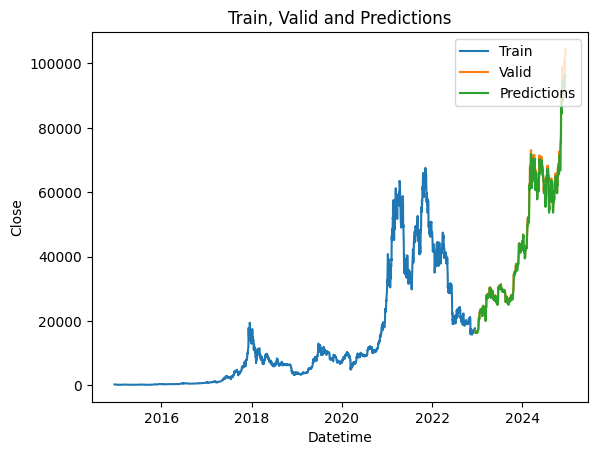

In [59]:
plt.title('Train, Valid and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.plot(predict)
 
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper right')
 
plt.show()

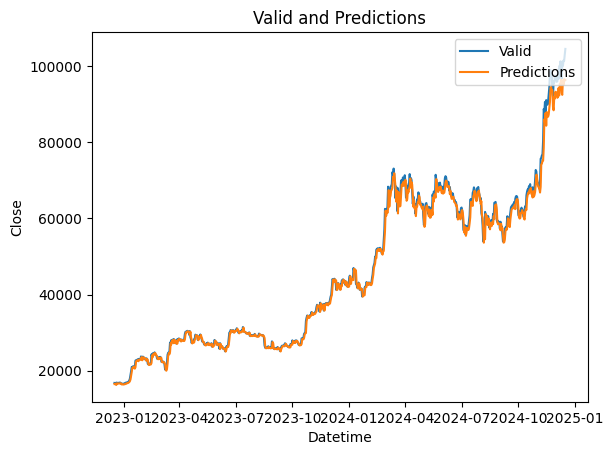

In [60]:
plt.title('Valid and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(valid[['Close']])
plt.plot(predict)
 
plt.legend(['Valid', 'Predictions'], loc='upper right')
 
plt.show()

In [61]:
closing_prices = scaled_data[len(scaled_data)-lookback:]
closing_prices = closing_prices.reshape(closing_prices.shape[0], 1)
print(closing_prices)

[[0.93227167]
 [0.92501238]
 [0.96812588]
 [0.95729353]
 [0.97086962]
 [0.97004246]
 [1.        ]]


In [62]:
current_batch = closing_prices.reshape(1, lookback, 1)
print(current_batch)

[[[0.93227167]
  [0.92501238]
  [0.96812588]
  [0.95729353]
  [0.97086962]
  [0.97004246]
  [1.        ]]]


In [63]:
predictions = []
time = int(7)
for i in range(time):  # Predicting 7 days
    # Get the prediction (next day)
    next_prediction = model.predict(current_batch)
    # print(scaler.inverse_transform(next_prediction))
    # Reshape the prediction to fit the batch dimension
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    
    # Append the prediction to the batch used for predicting
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    
    # Inverse transform the prediction to the original price scale
    predictions.append(scaler.inverse_transform(next_prediction)[0, 0])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[99076.67, 94216.46, 90279.54, 86707.89, 83581.695, 80850.98, 78461.375]


In [64]:
last_time = crypto_data_close.index[-1]
next_time = last_time + pd.Timedelta(days=1)
prediction_times = pd.date_range(start=next_time, periods=len(predictions), freq='1d')
predict = pd.DataFrame(index=prediction_times, data=predictions, columns=['Close'])
print(predict)

                                  Close
2024-12-17 00:00:00+00:00  99076.671875
2024-12-18 00:00:00+00:00  94216.460938
2024-12-19 00:00:00+00:00  90279.539062
2024-12-20 00:00:00+00:00  86707.890625
2024-12-21 00:00:00+00:00  83581.695312
2024-12-22 00:00:00+00:00  80850.976562
2024-12-23 00:00:00+00:00  78461.375000


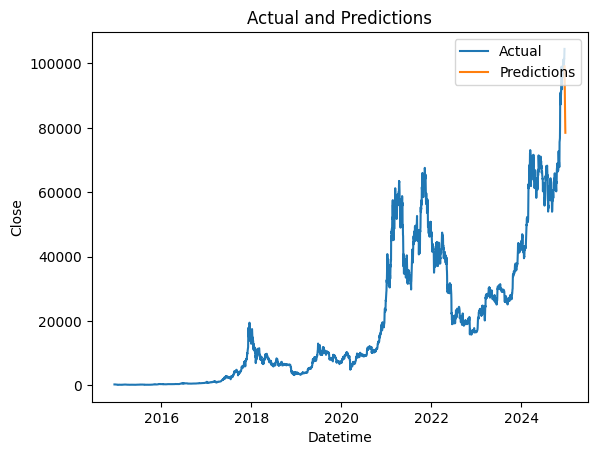

In [65]:
plt.title('Actual and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(crypto_data_close[['Close']])
plt.plot(predict)
 
plt.legend(['Actual', 'Predictions'], loc='upper right')
 
plt.show()

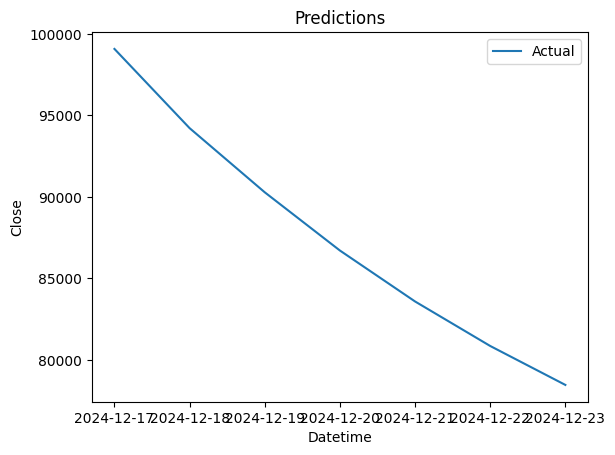

In [66]:
plt.title('Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(predict)
 
plt.legend(['Actual', 'Predictions'], loc='upper right')
 
plt.show()